In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.model_selection import KFold, cross_val_score


In [2]:
df = pd.read_csv('A2_data.csv')

In [3]:
df.head()

,alpha,delta,u,g,r,i,z,field_ID,MJD,redshift,plate,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,56064,-0.001584,854,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,53727,-0.824700,3292,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,54883,-0.418000,5888,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,51783,5.953000,536,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,56069,0.846000,9427,GALAXY


In [4]:
df = df.drop(columns=['MJD', 'plate', 'field_ID'])

In [5]:
print(df['class'].unique())

['GALAXY' 'QSO' 'STAR']


In [6]:
df = df.replace('GALAXY', 0)
df = df.replace('QSO', 1)
df = df.replace('STAR', 2)

In [7]:
df.head()

,alpha,delta,u,g,r,i,z,redshift,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,-0.001584,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,-0.824700,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,-0.418000,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,5.953000,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0.846000,0


In [8]:
print(df['class'].unique())

[0 1 2]


In [9]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:]

# print(df1.head)
# print(df2.head)

In [10]:
print(df1)

            alpha      delta         u         g         r         i  \
0      135.689107  32.494632  23.87882  22.27530  20.39501  19.16573   
1      144.826101  31.274185  24.77759  22.83188  22.58444  21.16812   
2      142.188790  35.582444  25.26307  22.66389  20.60976  19.34857   
3      338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454   
4      345.282593  21.183866  19.43718  17.58028  16.49747  15.97711   
...           ...        ...       ...       ...       ...       ...   
99995   39.620709  -2.594074  22.16759  22.97586  21.90404  21.30548   
99996   29.493819  19.798874  22.69118  22.38628  20.45003  19.75759   
99997  224.587407  15.700707  21.16916  19.26997  18.20428  17.69034   
99998  212.268621  46.660365  25.35039  21.63757  19.91386  19.07254   
99999  196.896053  49.464643  22.62171  21.79745  20.60115  20.00959   

              z  redshift  
0      18.79371 -0.001584  
1      21.61427 -0.824700  
2      18.94827 -0.418000  
3      19.25010  5.9530

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2, random_state=0)

k_folds = KFold(n_splits = 5)

In [12]:
scaler = preprocessing.StandardScaler().fit(df1)
df1 = scaler.transform(df1)

In [38]:
model = LogisticRegression(solver='lbfgs', C=0.05, multi_class='multinomial', random_state=0, max_iter=1000)
model.fit(x_train, y_train)

scores_lr = cross_val_score(model, df1, df2, cv = k_folds)

# model.fit(x_train, y_train)

c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [14]:
print("Average CV Score: ", scores.mean())

Average CV Score:  0.7368


In [34]:
# x_test = scaler.transform(x_test)

# y_pred = model.predict(x_test)

In [35]:
# print(model.score(x_train, y_train))

# print(model.score(x_test, y_test))

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [16]:
clf=RandomForestClassifier(n_estimators=100)

scores1 = cross_val_score(clf, df1, df2, cv = k_folds)

# clf.fit(x_train,y_train)

# y_pred=clf.predict(x_test)

c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed

In [18]:
print("Average CV Score: ", scores1.mean())

Average CV Score:  0.8707499999999999


In [39]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)

scores = cross_val_score(abc, df1, df2, cv = k_folds)


# model = abc.fit(x_train, y_train)

# #Predict the response for test dataset
# y_pred = model.predict(x_test)

c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [21]:
print("Average CV Score: ", scores.mean())

Average CV Score:  0.76705


In [ ]:
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.76835


n = 10

In [22]:
clf=RandomForestClassifier(n_estimators=10)

scores2 = cross_val_score(clf, df1, df2, cv = k_folds)

c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


KeyboardInterrupt: 

In [44]:
print("Average CV Score: ", scores2.mean())

Average CV Score:  0.8562100000000001


n = 1000

In [45]:
clf=RandomForestClassifier(n_estimators=1000)

scores3 = cross_val_score(clf, df1, df2, cv = k_folds)

c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\en

In [46]:
print("Average CV Score: ", scores3.mean())

Average CV Score:  0.8718899999999999


n = 10000

In [47]:
clf=RandomForestClassifier(n_estimators=10000)

scores4 = cross_val_score(clf, df1, df2, cv = k_folds)

c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\envs\va_splom_heatmap_parallel_coord\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\Ola\anaconda3\en

In [48]:
print("Average CV Score: ", scores4.mean())

Average CV Score:  0.8724699999999999


In [49]:
all_scores = []
all_scores.append(scores1)
all_scores.append(scores2)
all_scores.append(scores3)
all_scores.append(scores4)


[array([0.86715, 0.87585, 0.87115, 0.8737 , 0.8679 ]), array([0.852  , 0.85965, 0.8587 , 0.8601 , 0.8506 ]), array([0.8679 , 0.8751 , 0.8719 , 0.8742 , 0.87035]), array([0.86815, 0.8764 , 0.87275, 0.87465, 0.8704 ])]


In [50]:
print(all_scores)

[array([0.86715, 0.87585, 0.87115, 0.8737 , 0.8679 ]), array([0.852  , 0.85965, 0.8587 , 0.8601 , 0.8506 ]), array([0.8679 , 0.8751 , 0.8719 , 0.8742 , 0.87035]), array([0.86815, 0.8764 , 0.87275, 0.87465, 0.8704 ])]


In [23]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

from mlxtend.plotting import plot_decision_regions  

In [46]:
def plot_regions(algorithm, data_X, data_y, title):
    # Plotting decision regions
    plt.figure(figsize=(7,6))
    algorithm.plot = True
    plot_decision_regions(data_X, data_y, clf=algorithm, legend=0, colors='blue,red,orange')
    algorithm.plot = False
    # Adding axes annotations
    plt.xlabel('Feature 1', fontsize=13)
    plt.ylabel('Feature 2', fontsize=13)
    plt.title("Decision regions for " + title,  fontsize=15, pad=15)
    plt.savefig("results/"+ title.replace(" ", "_") +".svg")
    plt.show()

In [43]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

In [44]:
model = LogisticRegression(solver='lbfgs', C=0.05, multi_class='multinomial', random_state=0, max_iter=1000)
model.fit(x_pca, y_train)

scores_lr = cross_val_score(model, df1, df2, cv = k_folds)

c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Ola\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

In [29]:
print(x_pca.shape)

(100000, 2)


In [70]:
values = np.array(df.iloc[:,:1]).reshape(-1,)
keys = list(range(1, 100001))
values_dict = dict(zip(keys, values.T))


FileNotFoundError: [Errno 2] No such file or directory: 'results/Logistic_Regression.svg'

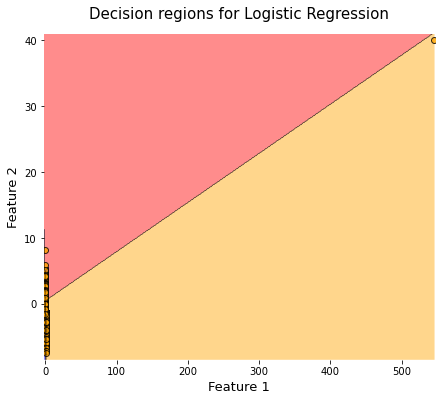

In [47]:
y_data = np.array(y_train).reshape(-1,)
# values = np.array(df.iloc[:,:1])
# print(values)
plot_regions(model, x_pca, y_data, 'Logistic Regression')